In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# יצירת נתונים עם הפרדה ליניארית
X_linear, y_linear = make_blobs(n_samples=100000, centers=2, random_state=42, cluster_std=1.5)

# יצירת נתונים לא ליניאריים
X_nonlinear, y_nonlinear = make_circles(n_samples=100000, factor=0.5, noise=0.1, random_state=42)

# חלוקת הנתונים לסט אימון ובדיקה
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(X_linear, y_linear, test_size=0.2, random_state=42)
X_train_nonlinear, X_test_nonlinear, y_train_nonlinear, y_test_nonlinear = train_test_split(X_nonlinear, y_nonlinear, test_size=0.2, random_state=42)

In [3]:
# SVM עם קרנל ליניארי
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train_linear, y_train_linear)

y_pred_linear = svm_linear.predict(X_test_linear)
acc_linear = accuracy_score(y_test_linear, y_pred_linear)
print(acc_linear)

0.9995


In [4]:
# SVM עם קרנל RBF
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train_nonlinear, y_train_nonlinear)

y_pred_nonlinear = svm_rbf.predict(X_test_nonlinear)
acc_nonlinear = accuracy_score(y_test_nonlinear, y_pred_nonlinear)
print(acc_nonlinear)

0.9926


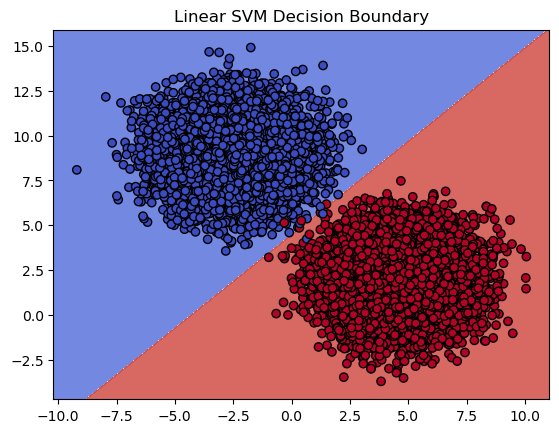

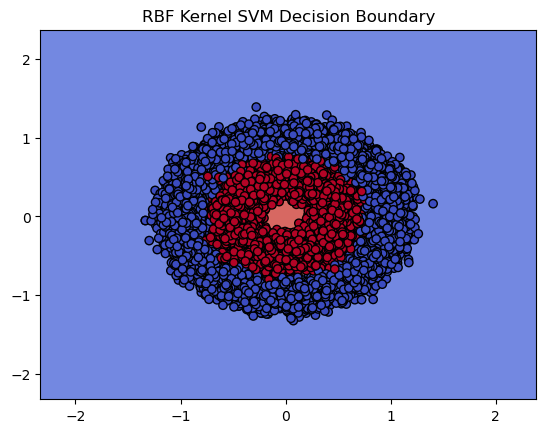

In [5]:
# הצגת הנתונים והגבול המפריד
def plot_decision_boundary(X, y, model, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.show()

# גרפים
plot_decision_boundary(X_test_linear, y_test_linear, svm_linear, "Linear SVM Decision Boundary")
plot_decision_boundary(X_test_nonlinear, y_test_nonlinear, svm_rbf, "RBF Kernel SVM Decision Boundary")